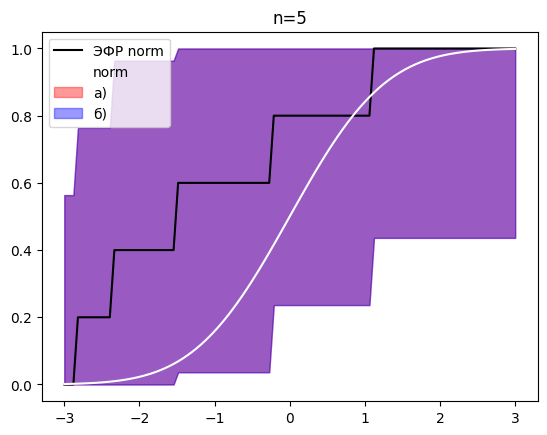

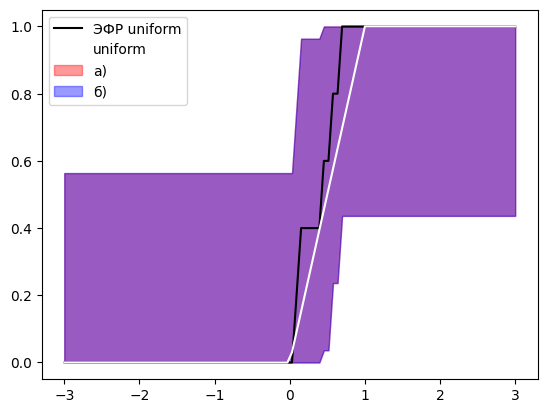

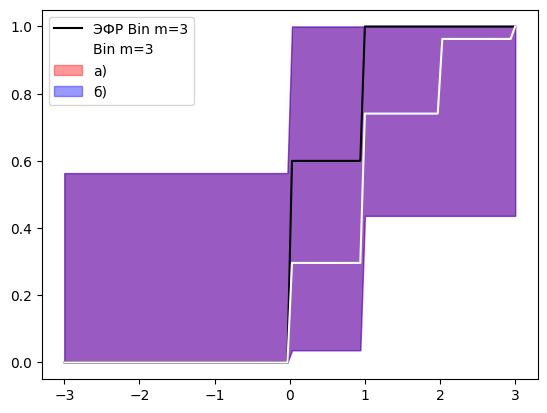

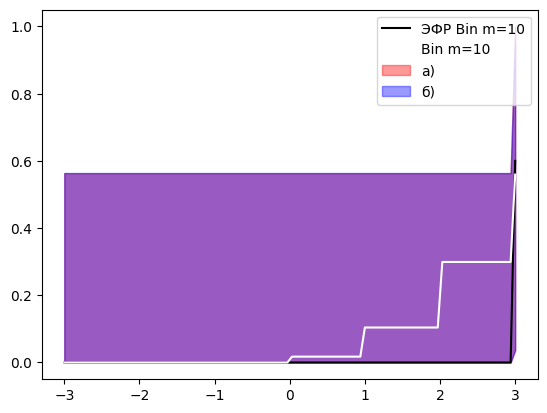

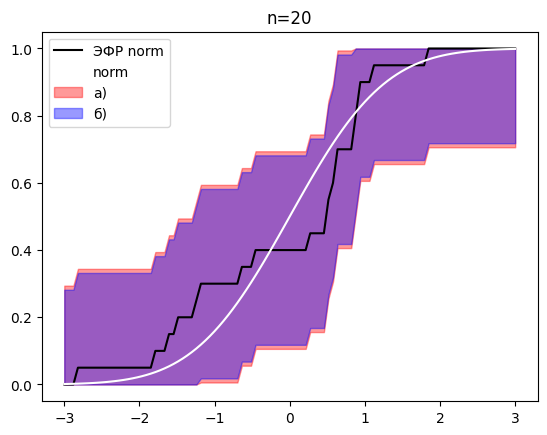

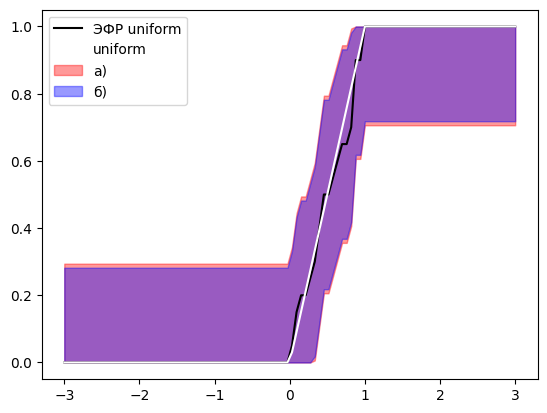

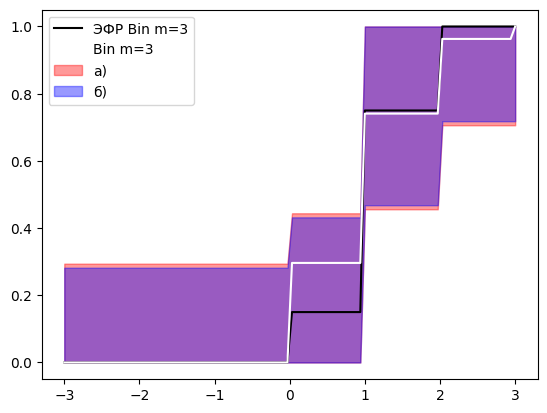

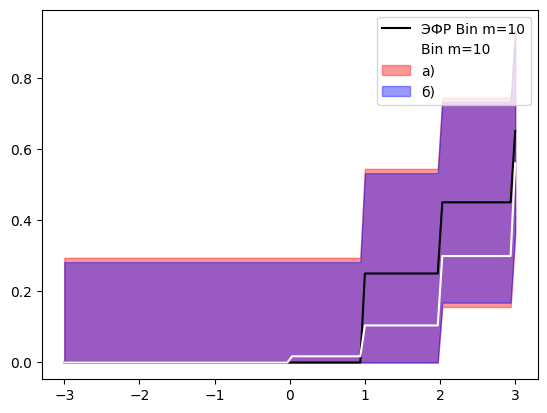

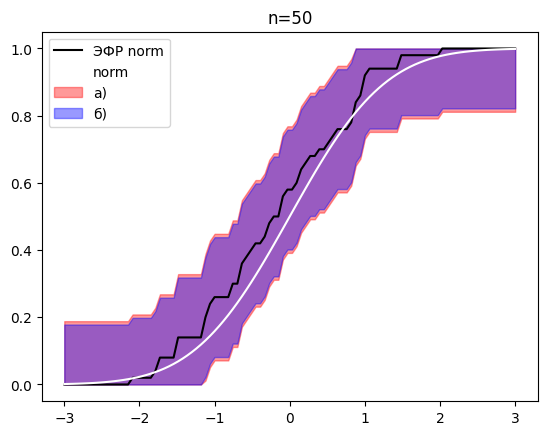

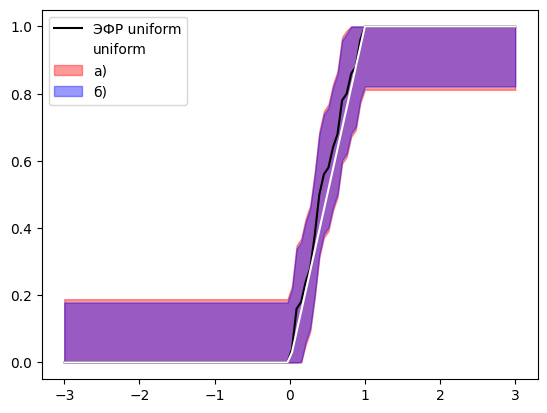

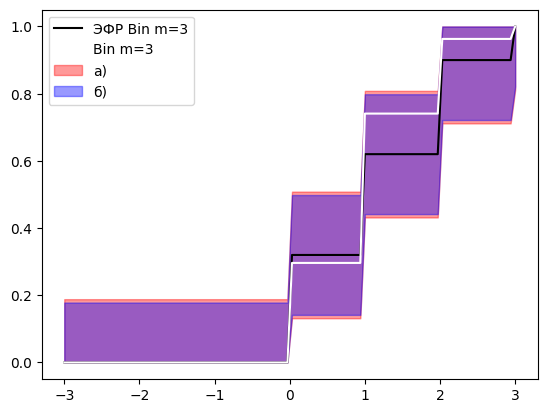

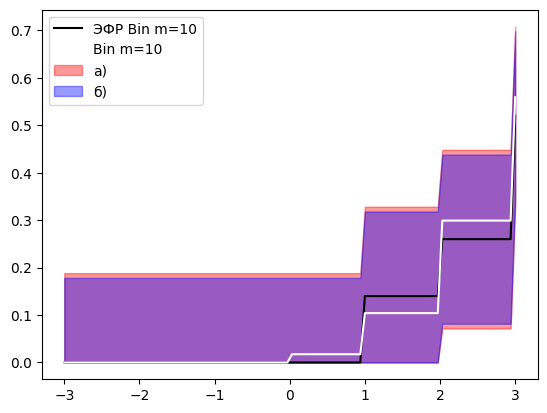

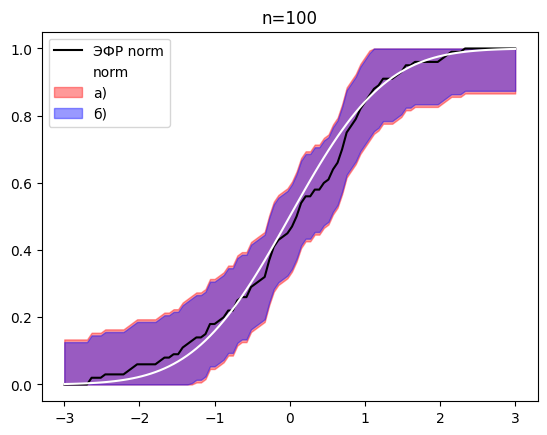

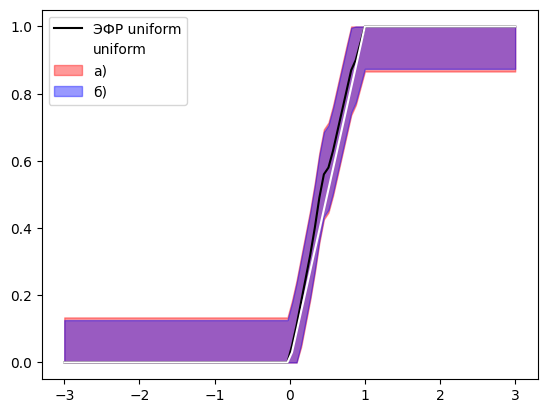

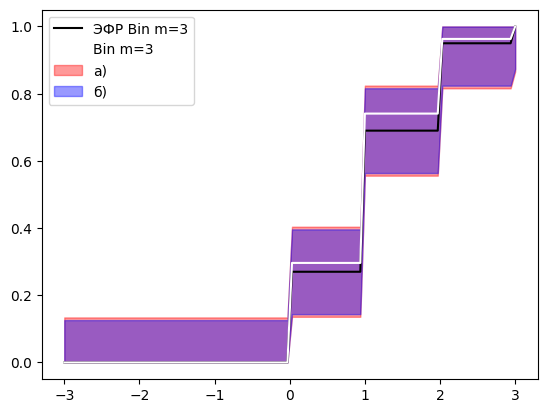

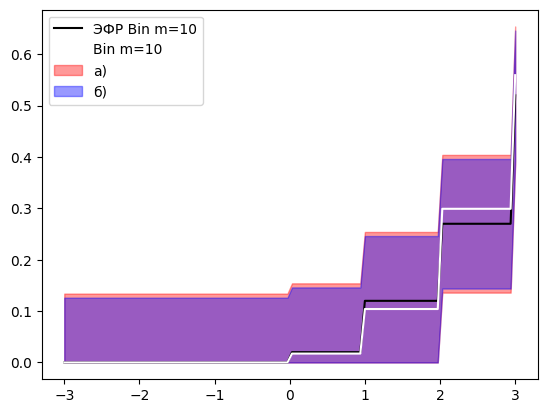

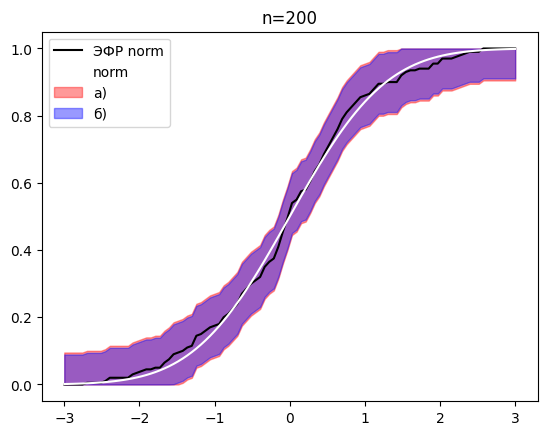

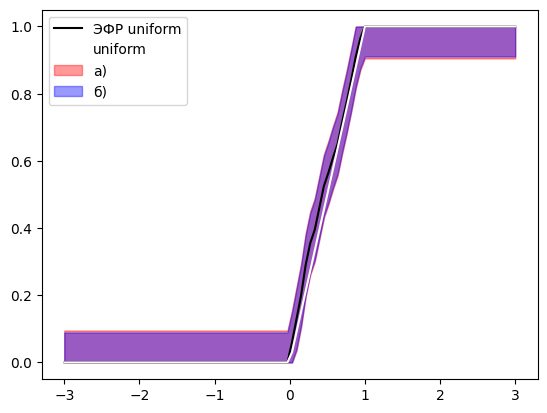

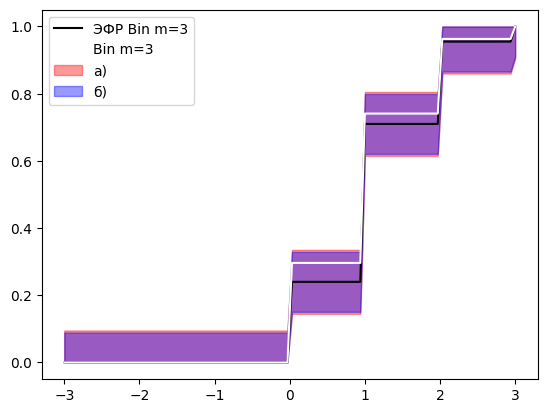

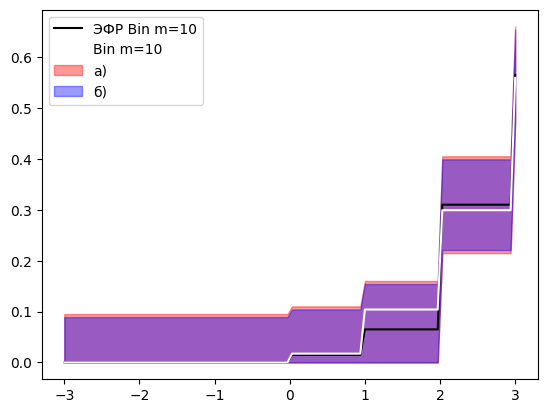

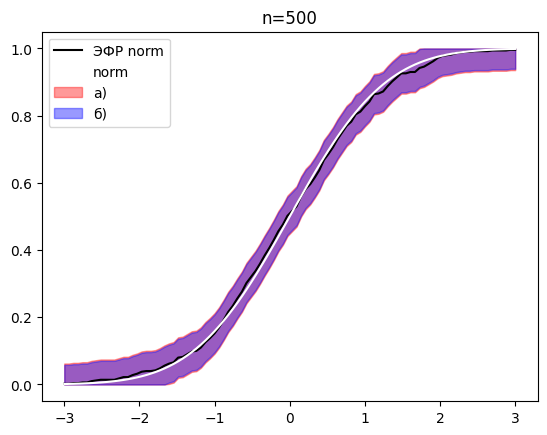

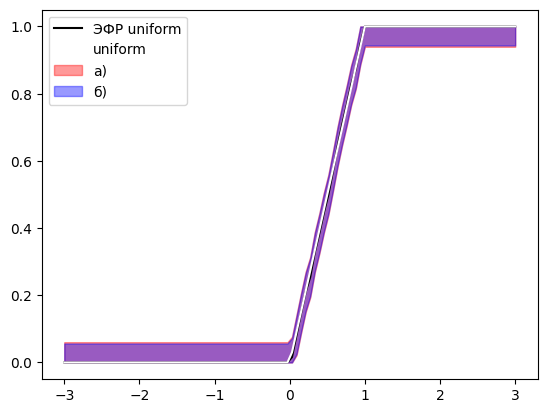

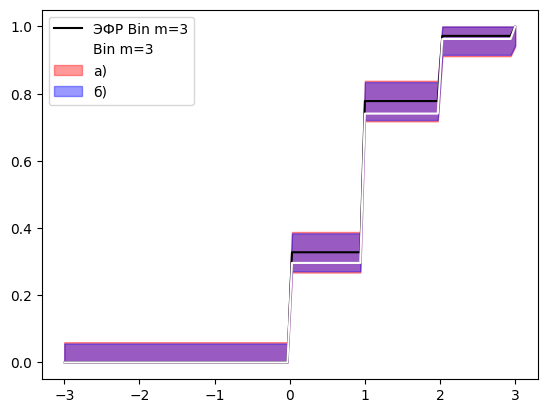

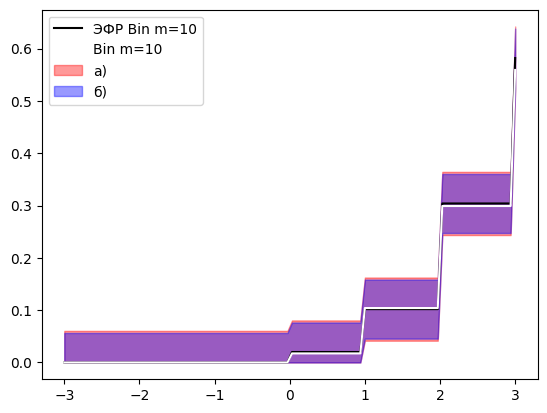

In [ ]:
#Задание 1
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

def I(x, X):
  return X<=x

def F(x, X, n):
  F=0
  for i in range(n):
    F+=I(x, X[i])
  F=F/n
  return F

x=np.linspace(-3, 3, 100)

p=1/3


for n in [5, 20, 50, 100, 200, 500]:

  w=stats.kstwo.ppf(0.95, n)

  k=np.sqrt((-1)*np.log(0.05)/(np.log(2)*np.e*n))



  X=stats.norm.rvs(loc=0, scale=1, size=n)
  Y=stats.uniform.rvs(loc=0, scale=1, size=n)
  Z=stats.binom.rvs(n=3, p=p, size=n)
  ZZ=stats.binom.rvs(n=10, p=p, size=n)

  plt.title(f'n={n}')

  plt.plot(x, F(x, X, n), label=f'ЭФР norm', color='black')
  plt.plot(x, stats.norm.cdf(x, loc=0, scale=1), label='norm', color='w')
  upper_bound1 = np.minimum(F(x, X, n)+w, 1)
  lower_bound1 = np.maximum(F(x, X, n)-w, 0)
  upper_bound2 = np.minimum(F(x, X, n)+k, 1)
  lower_bound2 = np.maximum(F(x, X, n)-k, 0)
  plt.fill_between(x, upper_bound1, lower_bound1, label='а)', color='r', alpha=0.4)
  plt.fill_between(x, upper_bound2, lower_bound2, label='б)', color='b', alpha=0.4)

  plt.legend()
  plt.show()

  plt.plot(x, F(x, Y, n), label=f'ЭФР uniform', color='black')
  plt.plot(x, stats.uniform.cdf(x, loc=0, scale=1), label='uniform', color='w')
  upper_bound1 = np.minimum(F(x, Y, n)+w, 1)
  lower_bound1 = np.maximum(F(x, Y, n)-w, 0)
  upper_bound2 = np.minimum(F(x, Y, n)+k, 1)
  lower_bound2 = np.maximum(F(x, Y, n)-k, 0)
  plt.fill_between(x, upper_bound1, lower_bound1, label='а)', color='r', alpha=0.4)
  plt.fill_between(x, upper_bound2, lower_bound2, label='б)', color='b', alpha=0.4)

  plt.legend()
  plt.show()

  plt.plot(x, F(x, Z, n), label=f'ЭФР Bin m={3}', color='black')
  plt.plot(x, stats.binom.cdf(x, n=3, p=p), label=f'Bin m={3}', color='w')
  upper_bound1 = np.minimum(F(x, Z, n)+w, 1)
  lower_bound1 = np.maximum(F(x, Z, n)-w, 0)
  upper_bound2 = np.minimum(F(x, Z, n)+k, 1)
  lower_bound2 = np.maximum(F(x, Z, n)-k, 0)
  plt.filуnd1, lower_bound1, label='а)', color='r', alpha=0.4)
  plt.fill_between(x, upper_bound2, lower_bound2, label='б)', color='b', alpha=0.4)

  plt.legend()
  plt.show()

  plt.plot(x, F(x, ZZ, n), label=f'ЭФР Bin m={10}', color='black')
  plt.plot(x, stats.binom.cdf(x, n=10, p=p), label=f'Bin m={10}', color='w')
  upper_bound1 = np.minimum(F(x, ZZ, n)+w, 1)
  lower_bound1 = np.maximum(F(x, ZZ, n)-w, 0)
  upper_bound2 = np.minimum(F(x, ZZ, n)+k, 1)
  lower_bound2 = np.maximum(F(x, ZZ, n)-k, 0)
  plt.fill_between(x, upper_bound1, lower_bound1, label='а)', color='r', alpha=0.4)
  plt.fill_between(x, upper_bound2, lower_bound2, label='б)', color='b', alpha=0.4)

  plt.legend()
  plt.show()






θ₁:  0.005628873364474351  θ₂:  0.0007289769708447164  θ₃:  0.005628872317697043
163 532 266


NameError: ignored

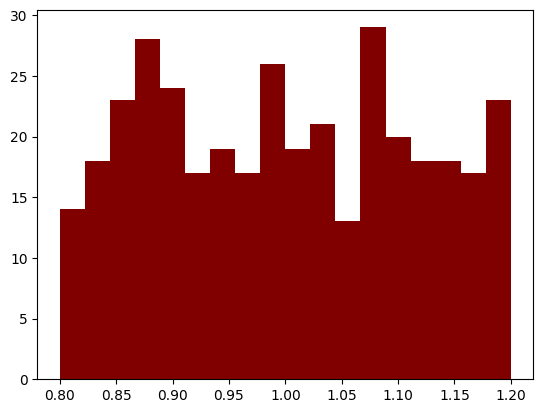

In [ ]:
#Задача 3
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

n=5
a=1

data=stats.norm(loc=a, scale=1).rvs(size=n)
data.sort()

t1=np.mean(data)

def D(x):
  D=stats.norm.cdf(data[0], loc=x, scale=1)
  for i in range(1, n):
    D*=(stats.norm.cdf(data[i], loc=x, scale=1) - stats.norm.cdf(data[i-1], loc=x, scale=1))
  D*=(1 - stats.norm.cdf(data[n-1], loc=x, scale=1))
  return -D

res=scipy.optimize.minimize_scalar(D)
t2=res.x

def L(x):
  lnL = (n/2) * np.log(np.pi)
  for i in range(n):
    lnL -= (1/2) * ((data[i] - x)**2)
  return -lnL

ress=scipy.optimize.minimize_scalar(L)
t3=ress.x

print("θ\u2081: ", t1, " θ\u2082: ", float(t2), " θ\u2083: ", float(t3))

k=1000
T1=[]
T2=[]
T3=[]
T11=[]
T22=[]
T33=[]
n1=0
n2=0
n3=0

for i in range(k):
  a=1

  data=stats.norm(loc=a, scale=1).rvs(size=n)
  data.sort()

  t1=np.mean(data)

  def D(x):
    D=stats.norm.cdf(data[0], loc=x, scale=1)
    for i in range(1, n):
      D*=(stats.norm.cdf(data[i], loc=x, scale=1) - stats.norm.cdf(data[i-1], loc=x, scale=1) )
    D*=(1 - stats.norm.cdf(data[n-1], loc=x, scale=1 ) )
    return -D

  res=scipy.optimize.minimize_scalar(D)
  t2=res.x

  def L(x):
    lnL = (n/2) * np.log(np.pi)
    for i in range(n):
      lnL -= (1/2) * ((data[i] - x)**2)
    return -lnL

  ress=scipy.optimize.minimize_scalar(L)
  t3=ress.x

  r1=math.fabs(t1-a)
  r2=math.fabs(t2-a)
  r3=math.fabs(t3-a)

  if (r1 < r2)&(r1 < r3):
    n1+=1
  if (r2 < r1)&(r2 < r3):
    n2+=1
  if (r3 < t2)&(r3 < r1):
    n3+=1




  T1.append(t1)
  T2.append(t2)
  T3.append(t3)

  T11.append(np.sqrt(k)*(t1-a))
  T22.append(np.sqrt(k)*(t2-a))
  T33.append(np.sqrt(k)*(t3-a))

print(n1, n2, n3)

plt.hist(T1, label='ОММ', color='maroon', bins=18, range=(0.8, 1.2))
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()

plt.hist(T2, label='ОМС', color='peachpuff', bins=18, range=(0.8, 1.2))
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()

plt.hist(T3, label='ОМП', color='darkviolet', bins=18, range=(0.8, 1.2))
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()

plt.hist(T11, label='ОММ',  color='green', bins=18, alpha=0.4)
plt.hist(T22, label='ОМС', color='tomato', bins=18, alpha=0.4)
plt.hist(T33, label='ОМП', color='paleturquoise', bins=18, alpha=0.4)
plt.axvline (x=theta, color='green', linestyle='--')
plt.legend()
plt.show()





Гипотеза H0 для нормального р-ия: True
Гипотеза H0 для биномиального р-ия m = 2: False
Гипотеза H0 для р-ия Ирвина-Холла: True


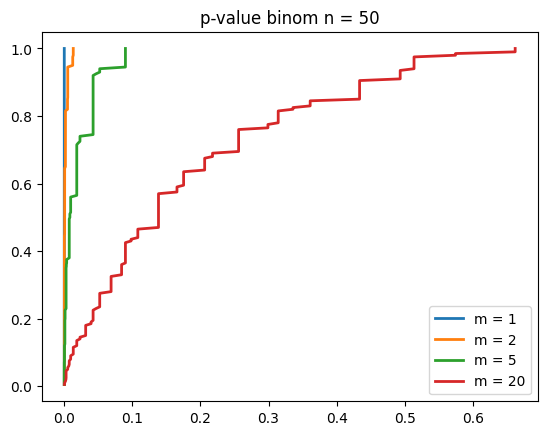

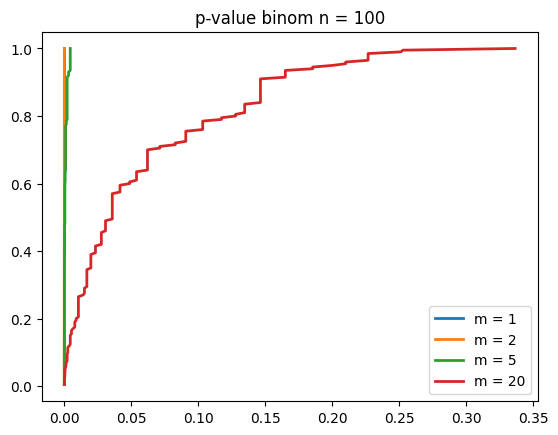

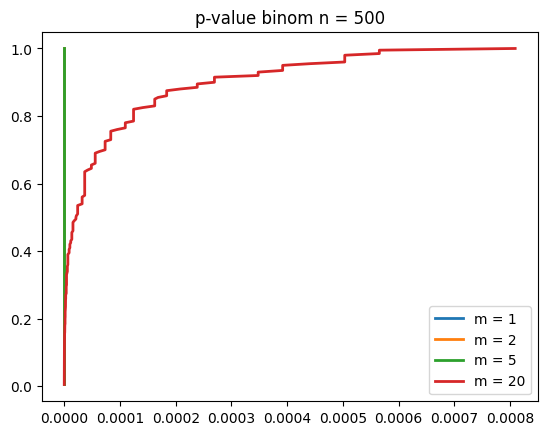

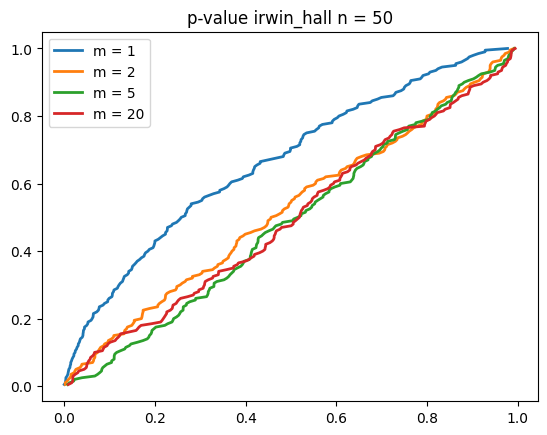

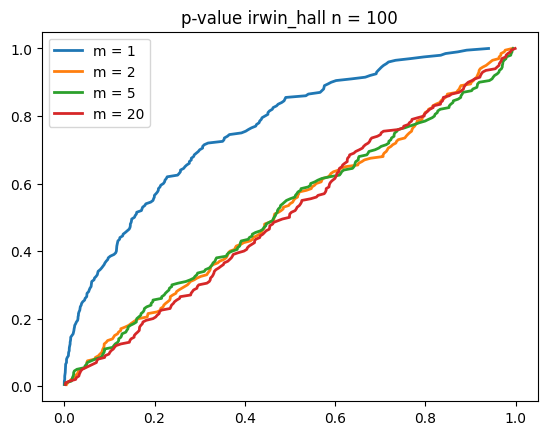

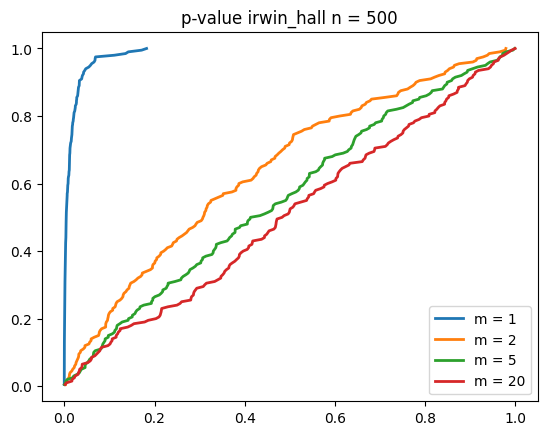

In [ ]:
## Задача 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, binom, kstest
from math import sqrt
from scipy.stats import kstwo

n = 50
m = 2

Y_normal = norm(loc=-3, scale=np.sqrt(8)).rvs(size = n)
X_normal = (Y_normal + 3) / np.sqrt(8)

Y_binom = binom(m, p=0.5).rvs(size = n)
X_binom = (Y_binom - m/2) / np.sqrt(m/4)

Y_irwin_hall = np.sum(np.random.uniform(size=(m, n)), axis=0)
X_irwin_hall = (Y_irwin_hall - m/2) / np.sqrt(m/12)


p_value_normal = kstest(X_normal, norm().cdf)
p_value_binom = kstest(X_binom, norm().cdf)
p_value_irwin_hall = kstest(X_irwin_hall, norm().cdf)


print('Гипотеза H0 для нормального р-ия:', p_value_normal[1] > 0.05)
print('Гипотеза H0 для биномиального р-ия m = 2:', p_value_binom[1] > 0.05)
print('Гипотеза H0 для р-ия Ирвина-Холла:', p_value_irwin_hall[1] > 0.05)

N = [50,100, 500]
def bin(n:int, theta:float):
    m = 200
    result1 = []
    for j in range (m):
        Y_binom = binom(theta, p=0.5).rvs(size = n)
        X_binom = (Y_binom - theta/2) / np.sqrt(theta/4)
        sample_val = stats.kstest(X_binom, stats.norm.cdf)
        result1 = np.append(result1, sample_val[1])
    result1 = np.sort(result1)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"p-value binom n = {n}")
    ax.plot(result1, y_vals, label = f"m = {theta}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

for n in N:
    fig,ax = plt.subplots()
    for theta in [1,2,5,20]:
        bin(n,theta)
    plt.legend()

def irwin_hall(n:int, theta:float):
    m = 200
    result1 = []
    for j in range (m):
        Y_irwin_hall = np.sum(np.random.uniform(size=(theta, n)), axis=0)
        X_irwin_hall = (Y_irwin_hall - theta/2) / np.sqrt(theta/12)
        sample_val = stats.kstest(X_irwin_hall, stats.norm.cdf)
        result1 = np.append(result1, sample_val[1])
    result1 = np.sort(result1)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"p-value irwin_hall n = {n}")
    ax.plot(result1, y_vals, label = f"m = {theta}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

for n in N:
    fig,ax = plt.subplots()
    for theta in [1,2,5,20]:
        irwin_hall(n,theta)
    plt.legend()




Гипотеза H0 о нормальности выборки X: True
Гипотеза H0 о нормальности выборки X_modified: True


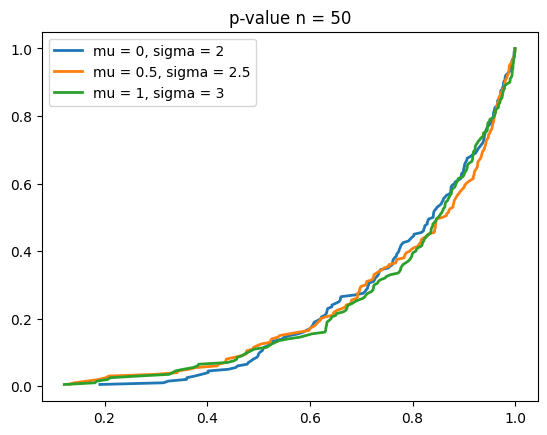

In [ ]:
## Задача 3
import numpy as np
from scipy.stats import norm, kstest
import matplotlib.pyplot as plt

n = 100
m = 0
s = 2

X = np.random.normal(loc=m, scale=np.sqrt(s), size=n)
X_modified = (X - np.mean(X)) / np.std(X)

print('Гипотеза H0 о нормальности выборки X:', kstest(X, norm().cdf)[1] > 0.05)
print('Гипотеза H0 о нормальности выборки X_modified:', kstest(X_modified, norm().cdf)[1] > 0.05)

N = 50
def task(n:int, mu:float, sigma:float):
    m = 200
    result1 = []
    for j in range (m):
        Y = norm(loc = mu, scale = sigma).rvs(size = n)
        X = (Y - np.mean(Y)) / np.std(Y)
        sample_val = stats.kstest(X, stats.norm.cdf)
        result1 = np.append(result1, sample_val[1])
    result1 = np.sort(result1)
    y_vals = [(i+1)/m for i in range(m)]
    plt.title(f"p-value n = {n}")
    ax.plot(result1, y_vals, label = f"mu = {mu}, sigma = {sigma}", lw = 2)

y_vals = [(i+1)/100 for i in range(100)]

fig,ax = plt.subplots()
task(N,0,2)
task(N, 0.5, 2.5)
task(N, 1,3)
plt.legend()